## Begin of the program
### import statements

#### based on embeddings

In [1]:
!pip install tensorflow scikit-learn pandas numpy pickle5
!pip install matplotlib
!pip install sentence_transformers
!pip install --upgrade transformers tensorflow
!pip install tf-keras

# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import pickle5 as pickle

import warnings
warnings.filterwarnings('ignore')


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Ignored the following versions that require a different python version: 2.14.1 Requires-Python >=3.8; 2.15.0 Requires-Python >=3.8; 2.15.0rc0 Requires-Python >=3.8; 2.15.0rc1 Requires-Python >=3.8; 2.15.1 Requires-Python >=3.8; 2.15.1rc0 Requires-Python >=3.8; 2.16.0 Requires-Python >=3.9; 2.16.0rc0 Requires-Python >=3.9; 2.16.0rc1 Requires-Python >=3.9; 2.16.0rc2 Requires-Python >=3.9; 2.16.0rc3 Requires-Python >=3.9; 2.16.0rc4 Requires-Python >=3.9; 2.17.0 Requires-Python >=3.9; 2.17.0rc0 Requires-Python >=3.9; 2.18.0 Requires-Python >=3.9; 2.18.0rc0 Requires-Python >=3.9; 2.19.0 Requires-Pytho

2025-04-21 16:22:55.146857: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-21 16:22:55.300854: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-04-21 16:22:55.300936: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-04-21 16:22:56.339698: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-

In [2]:
# Load the dataset
# df_orig = pd.read_csv('data/data.csv')
df_orig = pd.read_csv('data/data_100K.csv')
# print(df_orig.head())

In [3]:
df_orig.describe()

,CONVERSATIONID,TRANSCRIPT,TRANSCRIPT_SENTIMENT,EMPATHY,AGENT_PROFANITY,MEMBER_PROFANITY,PROFESSIONALISM
count,100000,100000,100000,100000,100000,98897,100000
unique,100000,99983,3,2,2,2,2
top,77392784-7494-44fc-892d-a6a10890ddfa,Member: 714-469-3482 is not available. Member:...,Positive,Yes,No,No,Yes
freq,1,4,54660,83264,99932,95860,98642


In [4]:
df = df_orig.rename(columns={'TRANSCRIPT': 'SUMMARY'}, inplace=True)
# df.set_axis(['TRANSCRIPT', 'SUMMARY', ...], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

In [5]:
df = df_orig[["SUMMARY", "TRANSCRIPT_SENTIMENT"]]

In [6]:
df['TRANSCRIPT_SENTIMENT'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [7]:
df['TRANSCRIPT_SENTIMENT'].isna().sum()

0

In [8]:
group_counts = df['TRANSCRIPT_SENTIMENT'].value_counts()
print(group_counts)

Positive    54660
Neutral     37428
Negative     7912
Name: TRANSCRIPT_SENTIMENT, dtype: int64


In [9]:
group_freq = df['TRANSCRIPT_SENTIMENT'].value_counts(normalize=True)
print(group_freq)

Positive    0.54660
Neutral     0.37428
Negative    0.07912
Name: TRANSCRIPT_SENTIMENT, dtype: float64


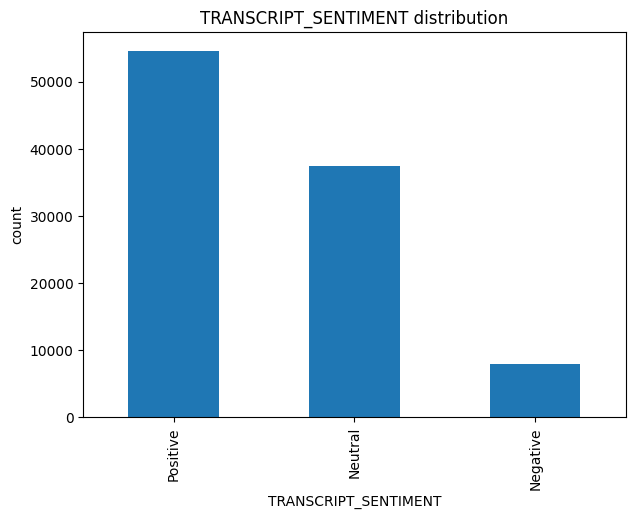

In [10]:
import matplotlib.pyplot as plt

df['TRANSCRIPT_SENTIMENT'].value_counts().plot(kind='bar', figsize=(7,5))
plt.title('TRANSCRIPT_SENTIMENT distribution')
plt.xlabel('TRANSCRIPT_SENTIMENT')
plt.ylabel('count')
plt.show()

<strong> reduce the size of DF so we can do quick testing. 
once done, comment this code.
</strong>

In [11]:
# df1 = df
# df = df1.sample(n=1000, random_state=1)

In [ ]:
df['SUMMARY'].iloc[0]

In [13]:
# clean up the text
# using clean-text module. 
%pip install clean-text
import cleantext
cleantext.__version__

from cleantext import clean

def clean_text_custom(text):
    return clean(text,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=True,         # replace all phone numbers with a special token
        no_numbers=True,               # replace all numbers with a special token
        no_digits=True,                # replace all digits with a special token
        no_currency_symbols=True,      # replace all currency symbols with a special token
        no_punct=True,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="<URL>",
        replace_with_email="<EMAIL>",
        replace_with_phone_number="<PHONE>",
        replace_with_number="<NUMBER>",
        replace_with_digit="0",
        replace_with_currency_symbol="<CUR>",
        lang="en"                       # 'en' for English
    )
    
df["SUMMARY"] = df["SUMMARY"].apply(clean_text_custom)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
df['SUMMARY'].iloc[0]

# Model building
##  preparing embeddings

In [15]:

from sentence_transformers import SentenceTransformer
warnings.filterwarnings('ignore')

# Example model and DataFrame (modify for your use case)
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


# Encode text into embeddings (shape: [num_rows, embedding_dim])
embeddings = np.array(model.encode(df["SUMMARY"].tolist()))

print(embeddings.shape)
df["EMBEDDINGS"] = embeddings.tolist()

# now save the dataframe in zip-compressed pickle file

df.to_pickle(
    "df_with_embeddings_2.pkl.zip", 
    compression="zip"
)
print("Saved df_no_japanese in zip-compressed pickle format.")

(100000, 384)
Saved df_no_japanese in zip-compressed pickle format.


In [16]:
df.sample(4)

,SUMMARY,TRANSCRIPT_SENTIMENT,EMBEDDINGS
50467,agent your call will be answered momentarily a...,Positive,"[-0.10235407948493958, -0.026985622942447662, ..."
93918,provider yeah agent your call will be answered...,Positive,"[-0.07385627180337906, 0.006600744556635618, -..."
3955,agent your call will be answered momentarily a...,Positive,"[-0.11553462594747543, -0.038492947816848755, ..."
56153,agent thank you for calling anthem blue cross ...,Negative,"[-0.07296857982873917, -0.01891135796904564, -..."


## load pickle file 

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import pickle5 as pickle

In [18]:
# now load the pickle file and work on it. 

df_loaded = pd.read_pickle("df_with_embeddings_2.pkl.zip")
df_loaded.sample(4)

,SUMMARY,TRANSCRIPT_SENTIMENT,EMBEDDINGS
68455,agent your call will be answered momentarily a...,Positive,"[-0.07674875110387802, 0.0125004593282938, -0...."
74924,agent thank you for calling anthem health keep...,Neutral,"[-0.056366194039583206, 0.03231031075119972, -..."
16568,agent your call will be answered momentarily a...,Positive,"[-0.1155027374625206, 0.011622719466686249, -0..."
35866,agent thank you for calling anthem agent calls...,Neutral,"[-0.11796660721302032, -0.014493259601294994, ..."


In [19]:
df_loaded.columns

Index(['SUMMARY', 'TRANSCRIPT_SENTIMENT', 'EMBEDDINGS'], dtype='object')

In [20]:
df_loaded["TRANSCRIPT_SENTIMENT"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [21]:
# Ensure embeddings and category labels are in the DataFrame

X = np.array(df_loaded["EMBEDDINGS"].tolist())  # Convert embeddings list to array
y = df_loaded["TRANSCRIPT_SENTIMENT"]  # 'TRANSCRIPT_SENTIMENT' column has target labels

In [22]:
# import few more statements

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [23]:
#converting to numeric class id
#Encode target labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_loaded["TRANSCRIPT_SENTIMENT"])  # y has target labels (TRANSCRIPT_SENTIMENT)

In [24]:
label_encoder.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [25]:
label_encoder.transform(label_encoder.classes_)

array([0, 1, 2])

In [26]:
z = zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))
print(dict(z))

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [27]:
# Split the data into training and validation sets.
# setting stratify to properly pick the distribution of test data

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded
)

In [28]:
# import few more packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2


In [29]:
# get number of classes from target train data; we should get 3
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

classes_train = np.unique(y_train, return_counts=True)[0]
counts_train = np.unique(y_train, return_counts=True)[1]

# print("classes_train:", classes_train)
# print("counts_train:", counts_train)


class_counts_train = {classes_train[i]:counts_train[i] for i in range(len(classes_train))}
print("class_counts_train:", class_counts_train)

Y_weights = {}
X_class_ratios = {}
Y_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for label, enc in Y_map.items():
    Y_weights[enc] = round(np.log(len(X_train)/class_counts_train[enc]), 2)
    X_class_ratios[enc] = round(class_counts_train[enc]/len(X_train))

print("training start")

# Define the Sequential model
classifier = Sequential()
classifier.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(1e-4)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(512, activation='relu', kernel_regularizer=l2(1e-4)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

## for last one,  matching the number of classes with what we predicting and using 'softmax' for activation
classifier.add(Dense(num_classes, activation='softmax'))

Number of classes: 3
class_counts_train: {0: 6330, 1: 29942, 2: 43728}
training start


2025-04-21 19:37:46.511218: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-04-21 19:37:46.511305: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2025-04-21 19:37:46.511352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sqapod-11042024-0): /proc/driver/nvidia/version does not exist
2025-04-21 19:37:46.511783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
# check the shape of X and y to ensure they are aligned correctly
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (100000, 384), y shape: (100000,)


In [31]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0005, epsilon=1e-06)
classifier.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy']) # sparse_categorical_crossentropy

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an early stopping callback that monitors the validation loss.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
# early stopping is used to prevent overfitting. 
# monitor the model’s performance on a separate validation set during training and to stop the 
# training process when the performance stops improving

history_accuracy = classifier.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=200, 
    validation_data=(X_test, y_test), 
    shuffle=True, 
    class_weight=Y_weights, 
    verbose=2,
    callbacks=[early_stopping]
)


Epoch 1/50
400/400 - 24s - loss: 1.3585 - accuracy: 0.4454 - val_loss: 1.1618 - val_accuracy: 0.5440 - 24s/epoch - 59ms/step
Epoch 2/50
400/400 - 21s - loss: 1.0889 - accuracy: 0.4957 - val_loss: 1.0468 - val_accuracy: 0.5720 - 21s/epoch - 52ms/step
Epoch 3/50
400/400 - 21s - loss: 1.0392 - accuracy: 0.5285 - val_loss: 1.0367 - val_accuracy: 0.5777 - 21s/epoch - 52ms/step
Epoch 4/50
400/400 - 21s - loss: 1.0217 - accuracy: 0.5372 - val_loss: 1.0276 - val_accuracy: 0.5751 - 21s/epoch - 53ms/step
Epoch 5/50
400/400 - 21s - loss: 1.0066 - accuracy: 0.5465 - val_loss: 1.0320 - val_accuracy: 0.5652 - 21s/epoch - 52ms/step
Epoch 6/50
400/400 - 21s - loss: 0.9960 - accuracy: 0.5463 - val_loss: 1.0238 - val_accuracy: 0.5541 - 21s/epoch - 52ms/step
Epoch 7/50
400/400 - 21s - loss: 0.9822 - accuracy: 0.5524 - val_loss: 1.0000 - val_accuracy: 0.5759 - 21s/epoch - 53ms/step
Epoch 8/50
400/400 - 21s - loss: 0.9723 - accuracy: 0.5535 - val_loss: 1.0105 - val_accuracy: 0.5551 - 21s/epoch - 52ms/step


In [33]:
# printing history values

for epoch in range(len(history_accuracy.history['loss'])):
    print(f"Epoch {(epoch+1):2.0f}: accuracy = {history_accuracy.history['accuracy'][epoch]:.4f}, "
          f"loss = {history_accuracy.history['loss'][epoch]:.4f}, "
          f"val_accuracy = {history_accuracy.history['val_accuracy'][epoch]:.4f}, "
          f"val_loss = {history_accuracy.history['val_loss'][epoch]:.4f}")

Epoch  1: accuracy = 0.4454, loss = 1.3585, val_accuracy = 0.5440, val_loss = 1.1618
Epoch  2: accuracy = 0.4957, loss = 1.0889, val_accuracy = 0.5720, val_loss = 1.0468
Epoch  3: accuracy = 0.5285, loss = 1.0392, val_accuracy = 0.5777, val_loss = 1.0367
Epoch  4: accuracy = 0.5372, loss = 1.0217, val_accuracy = 0.5751, val_loss = 1.0276
Epoch  5: accuracy = 0.5465, loss = 1.0066, val_accuracy = 0.5652, val_loss = 1.0320
Epoch  6: accuracy = 0.5463, loss = 0.9960, val_accuracy = 0.5541, val_loss = 1.0238
Epoch  7: accuracy = 0.5524, loss = 0.9822, val_accuracy = 0.5759, val_loss = 1.0000
Epoch  8: accuracy = 0.5535, loss = 0.9723, val_accuracy = 0.5551, val_loss = 1.0105
Epoch  9: accuracy = 0.5543, loss = 0.9626, val_accuracy = 0.5633, val_loss = 0.9962
Epoch 10: accuracy = 0.5586, loss = 0.9522, val_accuracy = 0.5655, val_loss = 0.9743
Epoch 11: accuracy = 0.5574, loss = 0.9438, val_accuracy = 0.5793, val_loss = 0.9509
Epoch 12: accuracy = 0.5589, loss = 0.9364, val_accuracy = 0.5900

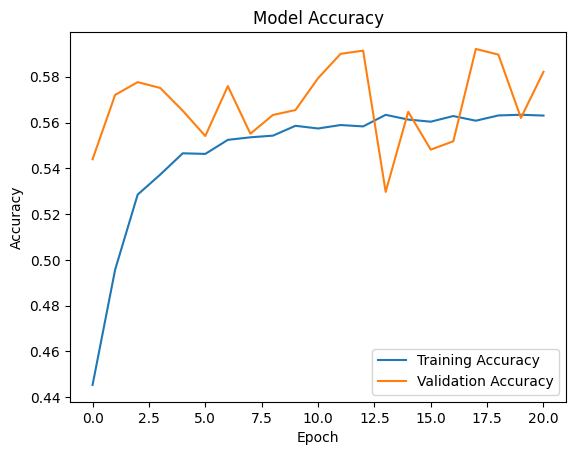

In [34]:
# draw a graph of accuracy curve from history data object
plt.plot(history_accuracy.history['accuracy'], label='Training Accuracy')
plt.plot(history_accuracy.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

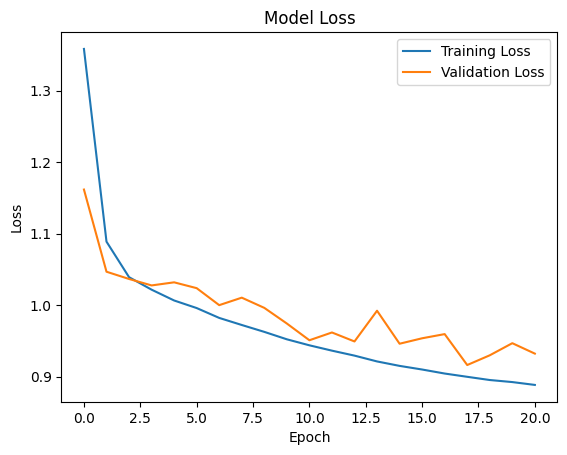

In [35]:
# draw Loss curve from history 

plt.plot(history_accuracy.history['loss'], label='Training Loss')
plt.plot(history_accuracy.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# now evaluate the model
loss, accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

625/625 [==============================] - 3s 4ms/step - loss: 0.9163 - accuracy: 0.5921
Test Loss: 0.9163, Test Accuracy: 0.5921


In [37]:
# make few predictions on the test set
pred_probs = classifier.predict(X_test)
pred_indices = np.argmax(pred_probs, axis=1)
pred_labels = label_encoder.inverse_transform(pred_indices)

import random
# Compare a few predictions with the true labels
# out of 1000 limited data we took, 20% is train data. 
# so, randomly pick 
for i in random.sample(range(1,200), 5):
    true_label = label_encoder.inverse_transform([y_test[i]])[0]
    print(f"Sample {i}: Predicted: {pred_labels[i]}, True: {true_label}")

625/625 [==============================] - 2s 3ms/step
Sample 20: Predicted: Neutral, True: Positive
Sample 61: Predicted: Positive, True: Positive
Sample 8: Predicted: Positive, True: Neutral
Sample 137: Predicted: Neutral, True: Neutral
Sample 7: Predicted: Neutral, True: Positive


In [38]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Alternatively, compute individual metrics (weighted averages for multi-class)
precision = precision_score(y_test, pred_indices, average='weighted')
recall = recall_score(y_test, pred_indices, average='weighted')
f1 = f1_score(y_test, pred_indices, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.5856
Recall: 0.5921
F1 Score: 0.5886


# Recall - calculate Recall 

In [39]:
# Recall is most valuble metric for this kind of scenarios. 
# Reason being: classifying a positive as Negative will have bigger impact. 
# so our model should make sure it does have minimum False Negatives. 

# now load the pickle file and work on it. 
df_loaded = pd.read_pickle("df_with_embeddings_2.pkl.zip")
df_loaded.sample(4)

# Ensure embeddings and category labels are in the DataFrame
# X1 = np.array(df_loaded["EMBEDDINGS"].tolist())  # Convert embeddings list to array
# y1 = df_loaded["TRANSCRIPT_SENTIMENT"]  # 'TRANSCRIPT_SENTIMENT' column has target labels


,SUMMARY,TRANSCRIPT_SENTIMENT,EMBEDDINGS
82097,agent your call will be answered momentarily a...,Positive,"[-0.08725899457931519, 0.014602357521653175, -..."
62015,agent your call will be answered momentarily a...,Positive,"[-0.09534967690706253, -0.04618494585156441, -..."
68914,member to assist the jp community and there lo...,Neutral,"[-0.09877398610115051, 0.017134271562099457, -..."
9199,provider okay agent thank you for calling anth...,Neutral,"[-0.08901234716176987, 0.0023580666165798903, ..."


In [40]:

# import few more statements

#converting to numeric class id
#Encode target labels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Tokenize and pad the review sequences
tokenizer = Tokenizer(num_words=5000, oov_token='')
tokenizer.fit_on_texts(df_loaded['SUMMARY'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df_loaded['SUMMARY'])
padded_sequences = pad_sequences(sequences, maxlen=300, truncating='post')

sentiment_labels = pd.get_dummies(df_loaded['TRANSCRIPT_SENTIMENT']).values

# Split the dataset into training and testing sets
X_recall_train, X_recall_test, y_recall_train, y_recall_test = train_test_split(padded_sequences, sentiment_labels, test_size=0.2)


from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential()
model.add(Embedding(5000, 300, input_length=300))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(1024, activation='relu', input_shape=(X_recall_train.shape[1],)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))


# but for this purpose, metric 'recall' is most appropriate
# For finding negative reviews, recall is generally a better metric to prioritize than accuracy.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Recall'])
model.summary()

# Create an early stopping callback that monitors the validation loss.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Train the model
history_recall = model.fit(X_recall_train, y_recall_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_recall_test, y_recall_test),
                    shuffle=True,
                    verbose=2,
                    callbacks=[early_stopping]
                   )


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          1500000   
                                                                 
 conv1d (Conv1D)             (None, 296, 64)           96064     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1024)              66560     
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 1024)             

In [41]:
# printing history values

for epoch in range(len(history_recall.history['loss'])):
    print(f"Epoch {(epoch+1):2.0f}: recall = {history_recall.history['recall'][epoch]:.4f}, "
          f"loss = {history_recall.history['loss'][epoch]:.4f}, "
          f"val_recall = {history_recall.history['val_recall'][epoch]:.4f}, "
          f"val_loss = {history_recall.history['val_loss'][epoch]:.4f}")


Epoch  1: recall = 0.5111, loss = 0.8827, val_recall = 0.5544, val_loss = 0.8036
Epoch  2: recall = 0.5519, loss = 0.7838, val_recall = 0.5606, val_loss = 0.7737
Epoch  3: recall = 0.5658, loss = 0.7577, val_recall = 0.5258, val_loss = 0.7809
Epoch  4: recall = 0.5928, loss = 0.7234, val_recall = 0.5665, val_loss = 0.7735
Epoch  5: recall = 0.6271, loss = 0.6775, val_recall = 0.5890, val_loss = 0.8195
Epoch  6: recall = 0.6660, loss = 0.6205, val_recall = 0.6144, val_loss = 0.8967
Epoch  7: recall = 0.7017, loss = 0.5632, val_recall = 0.5418, val_loss = 0.9128


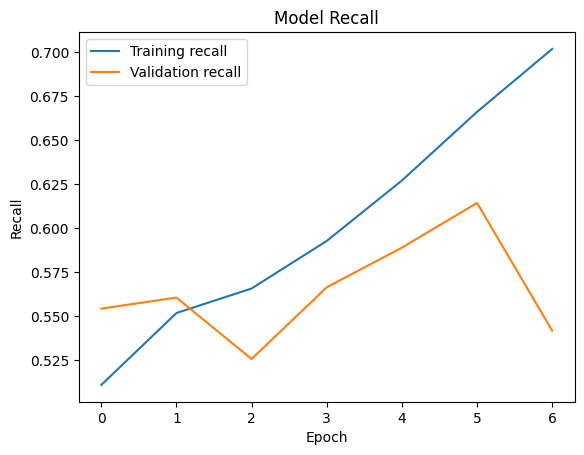

In [42]:

# draw a graph of recall curve from history data object
plt.plot(history_recall.history['recall'], label='Training recall')
plt.plot(history_recall.history['val_recall'], label='Validation recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()          


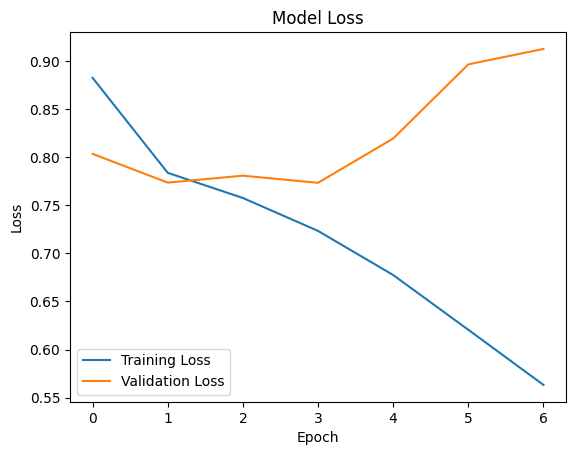

In [43]:
# draw Loss curve from history 

plt.plot(history_recall.history['loss'], label='Training Loss')
plt.plot(history_recall.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, recall_score
# Evaluate the model
y_recall_pred = np.argmax(model.predict(X_recall_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_recall_test, axis=-1), y_recall_pred ))
print("Recall:", recall_score(np.argmax(y_recall_test, axis=1), y_recall_pred, average='weighted' ) )


625/625 [==============================] - 20s 31ms/step
Accuracy: 0.6403
Recall: 0.6403


## ROC AUC score and Confusion matrix

In [45]:

from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize

# For multi-class ROC AUC and PR AUC, binarize the labels.
# Here we assume the classes are 0, 1, ..., num_classes-1.
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Compute ROC AUC using the One-vs-Rest (OvR) strategy, using macro-average.

roc_auc = roc_auc_score(y_test_binarized, pred_probs, average='macro', multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.4f}")

# Compute PR AUC (average precision score) for multi-class (macro-average).
# helpful for highly imbalanced datasets, as it focuses on the performance of the positive class.
pr_auc = average_precision_score(y_test_binarized, pred_probs, average='macro')
print(f"PR AUC Score: {pr_auc:.4f}")

ROC AUC Score: 0.7021
PR AUC Score: 0.5200


TODO
ROC AUC Score 0.6559 is pretty low. this may be due to very small sample I picked. 
re-write this again when model is run with all ~ 300K rows. 
clearly with full data score imporved. 

In [46]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Make predictions on the test set
pred_probabilities = classifier.predict(X_test)

# For multi-class classification, convert probabilities to class indices
pred_indices = np.argmax(pred_probabilities, axis=1)

# Compute per-class metrics using y_test (not y_encoded)
precision = precision_score(y_test, pred_indices, average=None)
recall = recall_score(y_test, pred_indices, average=None)
f1 = f1_score(y_test, pred_indices, average=None)

# Print per-class metrics with class names
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    class_name = label_encoder.inverse_transform([i])[0]
    print(f"{class_name}: Precision: {p:.4f}, Recall: {r:.4f}, F1 Score: {f:.4f}")

# Alternatively, print a full classification report
print("\nFull Classification Report:")
print(classification_report(y_test, pred_indices, target_names=label_encoder.classes_))

625/625 [==============================] - 2s 4ms/step
Negative: Precision: 0.2381, Recall: 0.1991, F1 Score: 0.2169
Neutral: Precision: 0.5359, Recall: 0.5258, F1 Score: 0.5308
Positive: Precision: 0.6699, Recall: 0.6945, F1 Score: 0.6820

Full Classification Report:
              precision    recall  f1-score   support

    Negative       0.24      0.20      0.22      1582
     Neutral       0.54      0.53      0.53      7486
    Positive       0.67      0.69      0.68     10932

    accuracy                           0.59     20000
   macro avg       0.48      0.47      0.48     20000
weighted avg       0.59      0.59      0.59     20000



In [47]:

from sklearn.metrics import confusion_matrix

# Assume y_test and pred_indices are defined and have the same length.
cm = confusion_matrix(y_test, pred_indices)
total_samples = cm.sum()
per_class_accuracy = []

for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total_samples - (TP + FP + FN)
    class_accuracy = (TP + TN) / total_samples
    per_class_accuracy.append(class_accuracy)

# Print per-class accuracy with class names
for i, acc in enumerate(per_class_accuracy):
    class_name = label_encoder.inverse_transform([i])[0]
    print(f"{class_name}: Accuracy: {acc:.4f}")


Negative: Accuracy: 0.8862
Neutral: Accuracy: 0.6521
Positive: Accuracy: 0.6460


Classification Report for Top 5 Classes:
              precision    recall  f1-score   support

    Positive       0.67      0.69      0.68     10932
     Neutral       0.54      0.53      0.53      7486
    Negative       0.24      0.20      0.22      1582

    accuracy                           0.59     20000
   macro avg       0.48      0.47      0.48     20000
weighted avg       0.59      0.59      0.59     20000



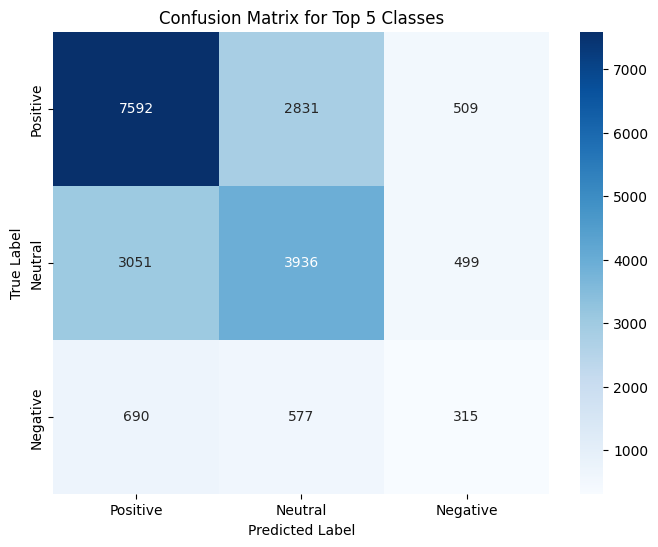

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume y_test and pred_indices are defined (pred_indices obtained from model.predict)
# Also assume label_encoder is defined so we can convert encoded labels to their names.

# 1. Count the frequency of each class in y_test
unique_classes, counts = np.unique(y_test, return_counts=True)

# 2. Identify the top classes (by count)
sorted_idx = np.argsort(counts)[::-1]  # sort indices descending by frequency
top5_classes = unique_classes[sorted_idx][:3]

# 3. Filter y_test and pred_indices to include only samples of these top 5 classes
mask = np.isin(y_test, top5_classes)
y_test_top5 = y_test[mask]
pred_indices_top5 = pred_indices[mask]

# 4. Compute the confusion matrix for the top 5 classes
cm_top5 = confusion_matrix(y_test_top5, pred_indices_top5, labels=top5_classes)

# Convert the class indices to their names for better visualization
class_names_top5 = label_encoder.inverse_transform(top5_classes)

# Optional: print a classification report for the top 5 classes
print("Classification Report for Top 5 Classes:")
print(classification_report(y_test_top5, pred_indices_top5, target_names=class_names_top5, labels=top5_classes))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_top5, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_top5,
            yticklabels=class_names_top5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Top 5 Classes')
plt.show()

625/625 [==============================] - 2s 4ms/step


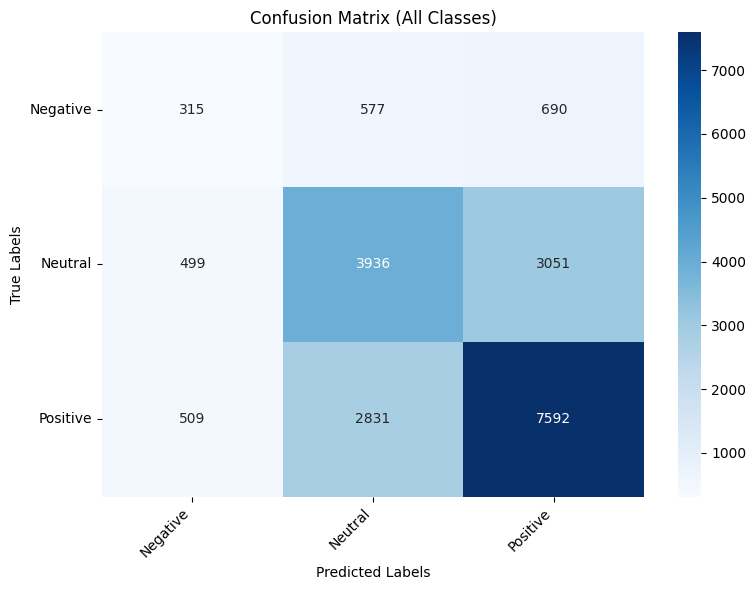

In [49]:
# Define class names from label_encoder
class_names = label_encoder.classes_

# Generate predictions
y_pred_proba = classifier.predict(X_test)
y_pred_indices = np.argmax(y_pred_proba, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_indices)

# Plot confusion matrix clearly
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (All Classes)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [50]:
# confusion matrix data validation 

import numpy as np
import pandas as pd

# 1. Get predictions
pred_proba = classifier.predict(X_test)
pred_indices = np.argmax(pred_proba, axis=1)

# 2. Identify top 5 classes
unique_classes, counts = np.unique(y_test, return_counts=True)
sorted_idx = np.argsort(counts)[::-1]
top5_classes = unique_classes[sorted_idx][:5]

train_indices, test_indices = train_test_split(
    df_loaded.index, 
    test_size=0.20, 
    random_state=42, 
    stratify=y_encoded
)

df_test = df_loaded.loc[test_indices].copy()
df_test['true_label']  = y_test
df_test['pred_label']  = pred_indices

df_test['true_label_name'] = label_encoder.inverse_transform(df_test['true_label'])
df_test['pred_label_name'] = label_encoder.inverse_transform(df_test['pred_label'])

# Keep only samples that belong to the top 5 classes
mask_top5 = df_test['true_label'].isin(top5_classes)

# Keep only misclassified samples (where predicted != actual)
mask_misclassified = df_test['true_label'] != df_test['pred_label']

# Combine both masks
df_misclassified_top5 = df_test[mask_top5 & mask_misclassified]

# df_test is a subset of the original df_no_japanese plus columns for labels
df_misclassified_top5 = df_test[mask_top5 & mask_misclassified].merge(
    df_loaded[['SUMMARY']],  # or whichever columns
    left_index=True,  # if df_test kept the same index as the original
    right_index=True
)


625/625 [==============================] - 2s 4ms/step


In [51]:
df_misclassified_top5.head(3)

,SUMMARY_x,TRANSCRIPT_SENTIMENT,EMBEDDINGS,true_label,pred_label,true_label_name,pred_label_name,SUMMARY_y
55547,member it agent thank you for calling anthem b...,Neutral,"[-0.07101013511419296, 0.009366570971906185, -...",1,2,Neutral,Positive,member it agent thank you for calling anthem b...
78652,agent your call will be answered momentarily a...,Positive,"[-0.07285186648368835, 0.0003139969485346228, ...",2,1,Positive,Neutral,agent your call will be answered momentarily a...
68612,agent your call will be answered momentarily a...,Neutral,"[-0.09938912838697433, -0.026861976832151413, ...",1,2,Neutral,Positive,agent your call will be answered momentarily a...


In [52]:
num_rows = df_misclassified_top5.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 8157


In [53]:
df_misclassified_top5.columns

Index(['SUMMARY_x', 'TRANSCRIPT_SENTIMENT', 'EMBEDDINGS', 'true_label',
       'pred_label', 'true_label_name', 'pred_label_name', 'SUMMARY_y'],
      dtype='object')

In [ ]:
mask = (
    (df_misclassified_top5["true_label_name"] == "Positive") &
    (df_misclassified_top5["pred_label_name"] == "Neutral")
)
df_filtered_cs_c = df_misclassified_top5[mask]

# Print just those filtered rows (all columns)
print(df_filtered_cs_c)
#df_filtered_cs_t_500 = print(df_filtered_cs_t.iloc[:500])


# Compare with other models( LogisticRegression, Random Forest, GB)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and fit logistic regression with balanced classes
log_reg = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Calculate accuracy
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.4900
Testing Accuracy: 0.4853


In [56]:
from sklearn.linear_model import LogisticRegression# 1. LOGISTIC REGRESSION

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Calculate "overall" precision, recall, and F1
# 'macro' averages metrics equally across classes,
# 'weighted' averages by class support (size).
lr_precision = precision_score(y_test, lr_preds, average='weighted')
lr_recall = recall_score(y_test, lr_preds, average='weighted')
lr_f1 = f1_score(y_test, lr_preds, average='weighted')

print("=== Logistic Regression (Overall Metrics) ===")
print(f"Precision (weighted): {lr_precision:.3f}")
print(f"Recall (weighted):    {lr_recall:.3f}")
print(f"F1-score (weighted):  {lr_f1:.3f}")

# (Optional) Detailed metrics per class
print("\nLogistic Regression classification report:")
print(classification_report(y_test, lr_preds))

=== Logistic Regression (Overall Metrics) ===
Precision (weighted): 0.600
Recall (weighted):    0.485
F1-score (weighted):  0.521

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.14      0.54      0.22      1582
           1       0.57      0.37      0.45      7486
           2       0.69      0.56      0.62     10932

    accuracy                           0.49     20000
   macro avg       0.46      0.49      0.43     20000
weighted avg       0.60      0.49      0.52     20000



In [57]:
from sklearn.ensemble import RandomForestClassifier

# Define and train Random Forest with balanced class weights
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predictions
train_preds_rf = rf.predict(X_train)
test_preds_rf = rf.predict(X_test)

# Accuracy calculation
train_accuracy_rf = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)

# Print accuracies clearly
print(f"Random Forest Training Accuracy: {train_accuracy:.4f}")
print(f"Random Forest Testing Accuracy: {test_accuracy:.4f}")


Random Forest Training Accuracy: 0.4900
Random Forest Testing Accuracy: 0.6058


In [58]:
# 2. RANDOM FOREST
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_precision = precision_score(y_test, rf_preds, average='weighted')
rf_recall = recall_score(y_test, rf_preds, average='weighted')
rf_f1 = f1_score(y_test, rf_preds, average='weighted')

print("=== Random Forest (Overall Metrics) ===")
print(f"Precision (weighted): {rf_precision:.3f}")
print(f"Recall (weighted):    {rf_recall:.3f}")
print(f"F1-score (weighted):  {rf_f1:.3f}")

# (Optional) Detailed metrics per class
print("\nRandom Forest classification report:")
print(classification_report(y_test, rf_preds))

=== Random Forest (Overall Metrics) ===
Precision (weighted): 0.590
Recall (weighted):    0.606
F1-score (weighted):  0.545

Random Forest classification report:
              precision    recall  f1-score   support

           0       0.27      0.02      0.04      1582
           1       0.64      0.28      0.39      7486
           2       0.60      0.91      0.73     10932

    accuracy                           0.61     20000
   macro avg       0.51      0.40      0.38     20000
weighted avg       0.59      0.61      0.55     20000



In [59]:
# GB classifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Gradient Boosting classifier
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit model
gb.fit(X_train, y_train)

# Predictions for both train and test
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Metrics calculation
metrics = lambda y_true, y_pred: {
    "Accuracy": round(np.mean(y_true = y_train if y_train_pred is y_train_pred else y_test) == y_train_pred, 3),
    "Precision": precision_score(y_true, y_train_pred if y_true is y_train else y_test_pred, average='weighted'),
    "Recall": recall_score(y_train if 'train' in locals() else y_test, y_train_pred if 'train' in locals() else y_test_pred, average='weighted'),
    "F1-score": f1_score(y_true, y_train_pred if y_true is y_train else y_test_pred, average='weighted')
}

# Training metrics
train_accuracy = gb.score(X_train, y_train)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Testing metrics
test_accuracy = gb.score(X_test, y_test)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Printing results clearly
print("=== Gradient Boosting: TRAIN Metrics ===")
print(f"Accuracy : {gb.score(X_train, y_train):.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-score:  {train_f1:.4f}")

print("\n=== Gradient Boosting: (TEST Metrics) ===")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-score:  {test_f1:.4f}")


=== Gradient Boosting: TRAIN Metrics ===
Accuracy : 0.6257
Precision: 0.6715
Recall:    0.6257
F1-score:  0.5647

=== Gradient Boosting: (TEST Metrics) ===
Accuracy:  0.6131
Precision: 0.6399
Recall:    0.6131
F1-score:  0.5491


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import pandas as pd
import numpy as np

# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(
    n_estimators=30, learning_rate=0.2, max_depth=2, random_state=42
)
gb.fit(X_train, y_train)  # Ensure X_train and y_train are defined before this line

# Predict on test data
y_test_pred = gb.predict(X_test)

# Metrics per class
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred)

# Creating DataFrame for clear viewing
metrics_df = pd.DataFrame({
    "Class": label_encoder.inverse_transform(np.unique(y_test)),
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "Support": support
})

# Sort by 'Support' clearly
metrics_df_sorted = metrics_df.sort_values(by='Support', ascending=False).reset_index(drop=True)

# Print the sorted metrics DataFrame
#print("\n=== Gradient Boosting Metrics Per Class ===")
#print(metrics_df.sort_values(by='Support', ascending=False).reset_index(drop=True))

# Overall accuracy clearly
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nOverall Test Accuracy: {accuracy:.4f}")

# Optional: Detailed classification report clearly displayed
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))



Overall Test Accuracy: 0.6062

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.01      0.01      1582
     Neutral       0.70      0.23      0.35      7486
    Positive       0.59      0.95      0.73     10932

    accuracy                           0.61     20000
   macro avg       0.70      0.40      0.36     20000
weighted avg       0.65      0.61      0.53     20000



# saving model 

In [61]:
#save the model
# Save the trained model in HDF5 format
classifier.save("classifier_model.h5")
print("✅ Model saved successfully as classifier_model.h5")

classifier.save("classifier_model.keras")
print("✅ Model saved successfully in .keras format!")


✅ Model saved successfully as classifier_model.h5
✅ Model saved successfully in .keras format!


# load model and test with data

In [62]:
# %pip install tensorflow #reload the model from saved file

from tensorflow.keras.models import load_model

#reload h5 saved format
# loaded_model = load_model("classifier_model.h5")
# loaded_model.summary()

loaded_model = load_model("classifier_model.keras")
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              394240    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [63]:
# Making Predictions
# X_test should be a NumPy array or tf.Tensor matching the input shape
predictions = loaded_model.predict(X_test)

625/625 [==============================] - 2s 4ms/step
